In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
from sklearn.linear_model import SGDRegressor
import iraklis7_linrg.config as config
import iraklis7_linrg.plots as plots
import iraklis7_linrg.modeling.train as train
import iraklis7_linrg.modeling.predict as predict

2026-01-27 14:52:43.091 | INFO     | iraklis7_linrg.config:<module>:15 - PROJ_ROOT path is: /Users/iraklis/git/iraklis7_linrg


### Create and fit the regression model

In [3]:
features_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_FEATURES
labels_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_LABELS
predictions_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PREDICTIONS
model_path: Path = config.MODELS_DIR / config.DATASET_MODEL
plot_path: Path = config.FIGURES_DIR / config.TRAINING_PLOT

features = config.read_data(features_path)
if features is None:
    raise ValueError("read_data failed - data is None")
labels = config.read_data(labels_path)
if labels is None:
    raise ValueError("read_data failed - data is None")

In [4]:
X_features = ['Εμβαδόν','Όροφος Ρετιρέ', 'Κατάσταση', 'Ασανσέρ από 3ο']
features = features[X_features]
features.head()

,Εμβαδόν,Όροφος Ρετιρέ,Κατάσταση,Ασανσέρ από 3ο
0,0.418097,-0.317675,1.263260,-1.268344
1,-0.778658,-0.317675,-0.827653,-1.268344
2,0.510156,3.147871,-0.827653,0.788430
3,-0.180281,-0.317675,1.263260,0.788430
4,-0.732629,-0.317675,-0.827653,0.788430


In [5]:
sgdr = SGDRegressor(max_iter=1000)
train.fit_model(sgdr, features, labels)

2026-01-27 14:52:43.610 | INFO     | iraklis7_linrg.modeling.train:fit_model:15 - SGDRegressor()
2026-01-27 14:52:43.619 | INFO     | iraklis7_linrg.modeling.train:fit_model:16 - number of iterations completed: 64, number of weight updates: 7681.0


/Users/iraklis/git/iraklis7_linrg/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### View parameters
Note, the parameters are associated with the *normalized* input data.

In [6]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:  w: {w_norm}, b:{b_norm}")

model parameters:  w: [82.04822508  0.1892846  17.11667009 35.60203436], b:[324.24402425]


### Make predictions
Predict the targets of the training data.

In [7]:
# make a prediction using sgdr.predict()
predictions = sgdr.predict(features)
config.write_data(predictions_path,pd.DataFrame(predictions, columns=['ΕκΤιμή']))

print(f"Prediction on training set:\n{predictions[:4]}" )
print(f"Target values \n{labels[:4]}")

Prediction on training set:
[334.95522852 200.9740734  380.60026579 359.08470479]
Target values 
    Τιμή
0  245.0
1  171.0
2  400.0
3  370.0


### Score model's performance

In [8]:
print("SCORE: ", sgdr.score(features, labels))
predict.score_model(labels, predictions)

SCORE:  0.4943049003211851
2026-01-27 14:52:43.700 | INFO     | iraklis7_linrg.modeling.predict:score_model:13 - MAE: 68.62474133543155
2026-01-27 14:52:43.700 | INFO     | iraklis7_linrg.modeling.predict:score_model:14 - MSE: 9146.217336033576
2026-01-27 14:52:43.701 | INFO     | iraklis7_linrg.modeling.predict:score_model:15 - MSLE: 0.07413433542607975
2026-01-27 14:52:43.702 | INFO     | iraklis7_linrg.modeling.predict:score_model:16 - MAPE: 0.22304610141845516
2026-01-27 14:52:43.703 | INFO     | iraklis7_linrg.modeling.predict:score_model:17 - MEAE: 48.009422440203394
2026-01-27 14:52:43.703 | INFO     | iraklis7_linrg.modeling.predict:score_model:18 - MAXE: 429.9070192310602
2026-01-27 14:52:43.704 | INFO     | iraklis7_linrg.modeling.predict:score_model:19 - EVS: 0.49430500748079564


### Plot Results
Let's plot the predictions versus the target values.

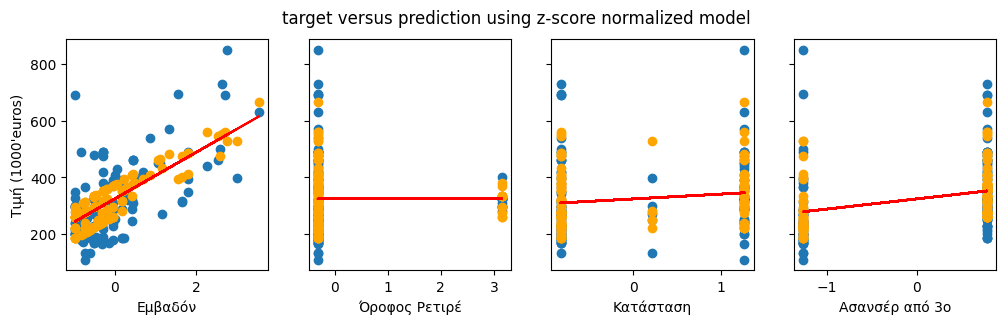

<Figure size 640x480 with 0 Axes>

In [11]:
featuresX = features.to_numpy()
plots.gen(list(features), featuresX, labels, predictions, w_norm, b_norm, show=True, output_path=plot_path)

### Save the trained model

In [10]:
train.save_model(sgdr, model_path)

2026-01-27 14:52:43.970 | DEBUG    | iraklis7_linrg.modeling.train:save_model:22 - Model saved to: /Users/iraklis/git/iraklis7_linrg/models/listings_data_model.joblib
